In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df=pd.read_csv('temp_datalab_records_linkedin_company.csv',parse_dates=['as_of_date'])

/anaconda3/envs/python37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2426196 entries, 0 to 2426195
Data columns (total 14 columns):
dataset_id               int64
as_of_date               datetime64[ns]
company_name             object
followers_count          int64
employees_on_platform    int64
link                     object
industry                 object
date_added               object
date_updated             object
description              object
website                  object
entity_id                float64
cusip                    float64
isin                     float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 259.1+ MB


In [11]:
#plot2: Count of employees over years in Information Technology and Services
df=df.loc[df.industry=='Information Technology and Services']
df['year']=df.as_of_date.apply(lambda x: x.year)


In [17]:
data

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin,year_x,year_y
0,58534,2015-12-31,L Brands,84182,29939,https://www.linkedin.com/company/2250,Retail,2015-12-31 00:00:00+00,2015-12-31 00:00:00+00,NaN,NaN,NaN,NaN,NaN,2015,2015
1,59196,2015-12-31,PHI Inc,5892,795,https://www.linkedin.com/company/238999,Airlines/Aviation,2015-12-31 00:00:00+00,2015-12-31 00:00:00+00,NaN,NaN,NaN,NaN,NaN,2015,2015
2,59197,2015-12-31,"PerkinElmer, Inc.",35514,5357,https://www.linkedin.com/company/4562,Biotechnology,2015-12-31 00:00:00+00,2015-12-31 00:00:00+00,NaN,NaN,NaN,NaN,NaN,2015,2015
3,58760,2015-12-31,Noble Energy,65060,2494,https://www.linkedin.com/company/27043,Oil & Energy,2015-12-31 00:00:00+00,2015-12-31 00:00:00+00,NaN,NaN,NaN,NaN,NaN,2015,2015
4,59198,2015-12-31,Aqua America,3305,664,https://www.linkedin.com/company/54472,Utilities,2015-12-31 00:00:00+00,2015-12-31 00:00:00+00,NaN,NaN,NaN,NaN,NaN,2015,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11307,902985,2018-07-17,"Diversified Restaurant Holdings, Inc (Nasdaq: ...",488,89,https://www.linkedin.com/company/428083,Restaurants,2018-07-17 17:17:08.8897+00,2018-07-17 17:17:08.889725+00,NaN,http://www.diversifiedrestaurantholdings.com,NaN,NaN,NaN,2018,2018
11308,903052,2018-07-17,First Financial Northwest Bank,785,118,https://www.linkedin.com/company/497673,Banking,2018-07-17 15:54:35.807059+00,2018-07-17 15:54:35.807085+00,NaN,http://www.ffnwb.com,NaN,NaN,NaN,2018,2018
11309,902948,2018-07-17,DMC Global Inc.,1521,184,https://www.linkedin.com/company/586890,Oil & Energy,2018-07-17 13:44:19.302482+00,2018-07-17 13:44:19.302508+00,NaN,http://www.dmcglobal.com,NaN,NaN,NaN,2018,2018
11310,910210,2018-07-17,ServiceSource,27963,2496,https://www.linkedin.com/company/11889,Information Technology and Services,2018-07-17 17:28:48.430667+00,2018-07-17 17:28:48.430717+00,NaN,http://www.servicesource.com,NaN,NaN,NaN,2018,2018


In [18]:
max_date=df.groupby(['year'])['as_of_date'].max().reset_index()
data=pd.merge(df,max_date,how='inner',on='as_of_date')
group=data.groupby(['year_x'])['employees_on_platform'].sum().reset_index()

In [19]:
group

,year_x,employees_on_platform
0,2015,11239360
1,2016,18096556
2,2017,25432346
3,2018,26620251


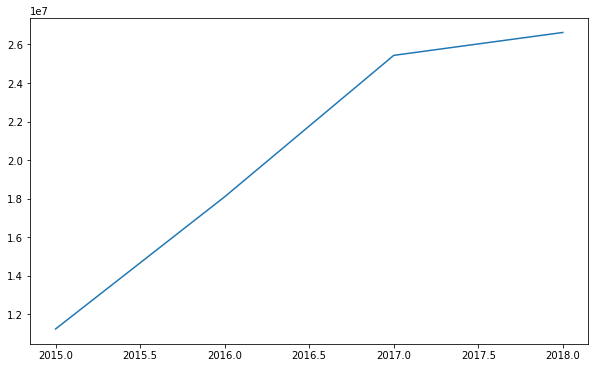

In [21]:

plt.figure(figsize=(10,6))
plt.plot(group.year_x,group.employees_on_platform)
plt.title('Count of Employees over time for ')
#plt.xticks(rotation=90)
plt.show()